In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [2]:
dummy = pd.read_csv('innomatics_data.csv',sep=',')
dummy.to_csv('modified_data.txt',sep=' ',index=False,header=['input','output'],mode='a')

In [3]:
df1 = pd.read_csv('modified_data.txt',sep=' ')

df1

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [15]:
# plt.plot(X,y,'*')
# plt.xlabel('input')
# plt.ylabel('outputs')
# plt.title('visulization of Data')


## Points to Notedown

In [4]:
df1.describe()
# please note that we can observe all this things from the data
# the data is non-linear containing outliers

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


### Detection of outliers using Z scores and replacing the outliers with mean values

In [5]:
z_scores = (df1 - df1.mean())/df1.std()
outliers = (np.abs(z_scores)>3).any(axis=1)
data = df1.copy()
data[outliers] = data[outliers].replace(df1[outliers],df1.mean())

<AxesSubplot:xlabel='input', ylabel='output'>

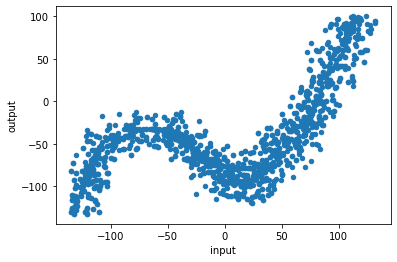

In [6]:
data = data[(data.loc[:,'output']<=100)]
data.plot(kind='scatter',x='input',y='output')

In [7]:
def poly_regression(x,y,deg):

    x = x.reshape((-1,1))
    y = y.reshape((-1,1))

    poly = PolynomialFeatures(degree=deg)

    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly,y)
    
    y_pred = model.predict(x_poly)

    mse = np.sqrt(metrics.mean_squared_error(y_pred,y))
    
  
    plt.plot(x,y_pred,color="red")
    plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
    plt.scatter(x,y,color="blue")
    plt.legend(["predicted polynomial","actual data points"])
    plt.show()

    print("The RMSE for polynomial regression is: {}".format(mse))
    

## Tuning the order from 0-8

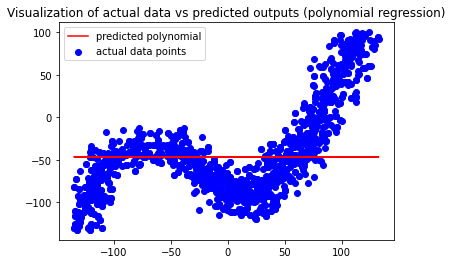

The RMSE for polynomial regression is: 51.271289034674666


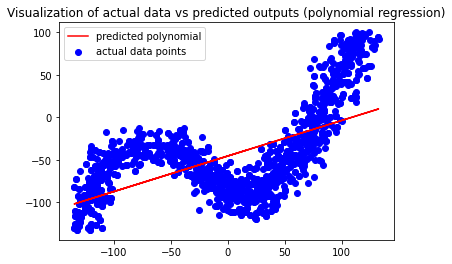

The RMSE for polynomial regression is: 40.6241755555875


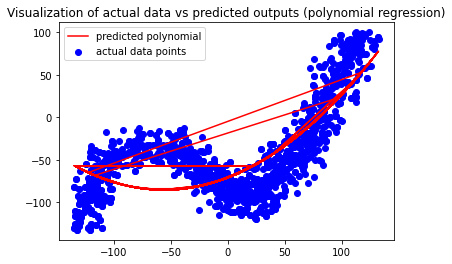

The RMSE for polynomial regression is: 33.2227842602334


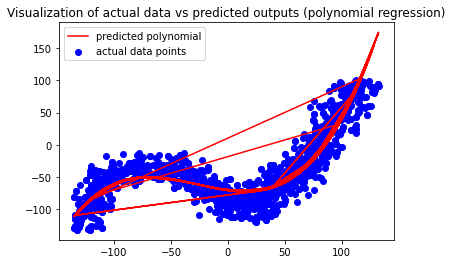

The RMSE for polynomial regression is: 23.66451792075546


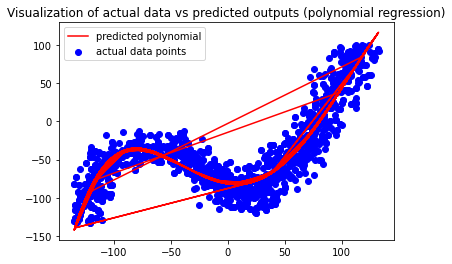

The RMSE for polynomial regression is: 21.04947329472443


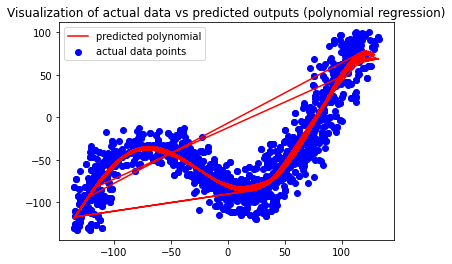

The RMSE for polynomial regression is: 19.633660739120856


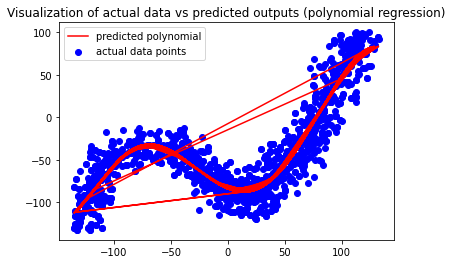

The RMSE for polynomial regression is: 19.529687478799833


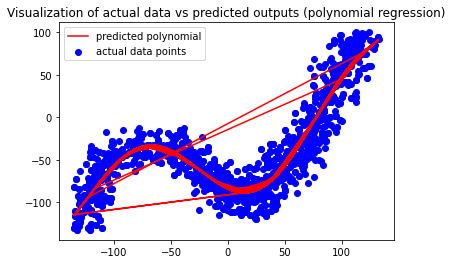

The RMSE for polynomial regression is: 19.505347280119008


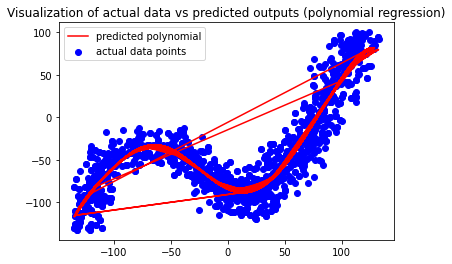

The RMSE for polynomial regression is: 19.48667832343895


In [8]:
#tuning the order from 0-8
for order in range(9):
    poly_regression(np.array(data.loc[:,'input']),np.array(data.loc[:,'output']),order)
   
    
    

# best from the above

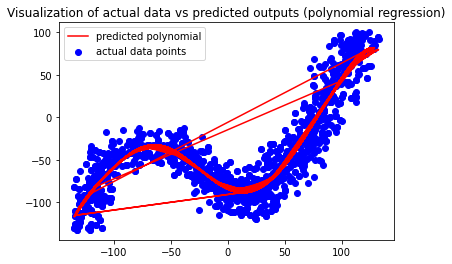

The RMSE for polynomial regression is: 19.48667832343895


In [9]:
poly_regression(np.array(data.loc[:,'input']),np.array(data.loc[:,'output']),8)

# Polynominal Regression with Ridge Regularization

In [10]:
def poly_regression_exp1(x,y,deg):

    x = x.reshape((-1,1))
    y = y.reshape((-1,1))
    
    
    model  = make_pipeline(PolynomialFeatures(degree=deg),Ridge(alpha=4.0))
    model.fit(x,y)

    
    y_pred = model.predict(x)

    mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

    plt.plot(x,y_pred,color="red")
    plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
    plt.scatter(x,y,color="blue")
    plt.legend(["predicted polynomial","actual data points"])
    plt.show()

    print("The RMSE for polynomial regression is: {}".format(mse))

## Tuning the order from 0-8

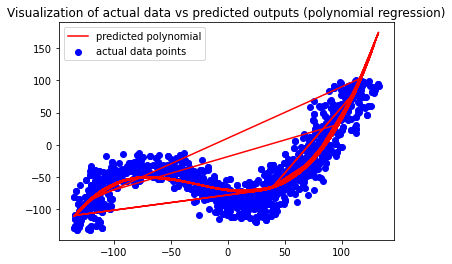

The RMSE for polynomial regression is: 23.664517920765697


/home/arun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70929e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


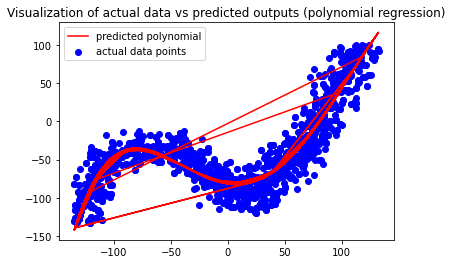

The RMSE for polynomial regression is: 21.049473294732834


/home/arun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75805e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


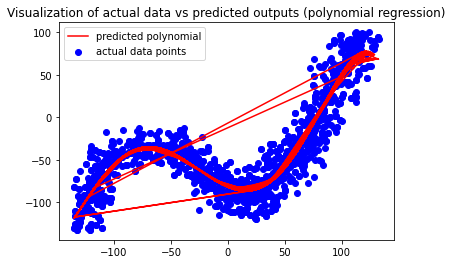

The RMSE for polynomial regression is: 19.633660739292672


/home/arun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50089e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


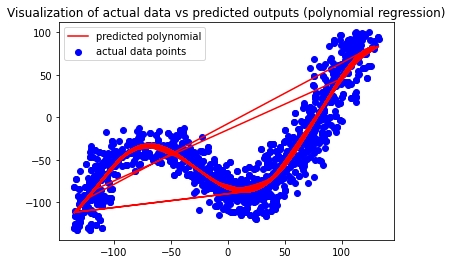

The RMSE for polynomial regression is: 19.529687478693265


/home/arun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.66214e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


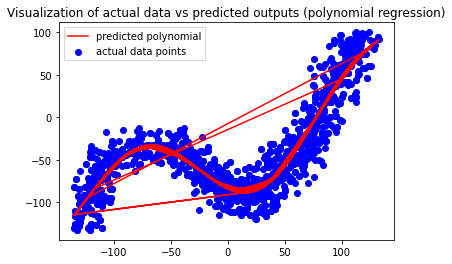

The RMSE for polynomial regression is: 19.505342486093983


/home/arun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.74114e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


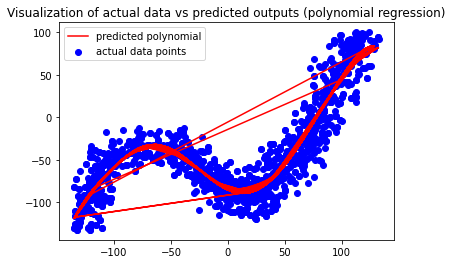

The RMSE for polynomial regression is: 19.468979331275783


In [11]:
for deg in range(3,9):
    poly_regression_exp1(np.array(data.loc[:,'input']),np.array(data.loc[:,'output']),deg)

# best from the above

/home/arun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.74114e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


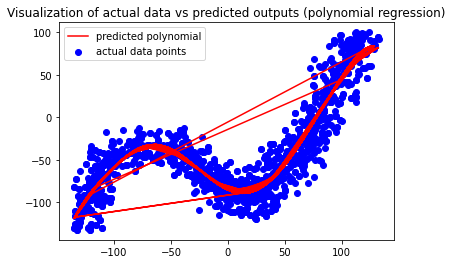

The RMSE for polynomial regression is: 19.468979331275783


In [12]:
poly_regression_exp1(np.array(data.loc[:,'input']),np.array(data.loc[:,'output']),8)